In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling
from sklearn.cross_validation import train_test_split

In [2]:
house=pd.read_csv('C:/Users/DELL-IN/Downloads/Video/AL/11/Advertising case study - Predictive Modelling/Advertising case study/Case Study - Housing Example/House_Prices.csv')

In [3]:
house.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
Home            128 non-null int64
Price           128 non-null int64
SqFt            128 non-null int64
Bedrooms        128 non-null int64
Bathrooms       128 non-null int64
Offers          128 non-null int64
Brick           128 non-null object
Neighborhood    128 non-null object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [5]:
house.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [6]:
house=house[['Price','SqFt','Bedrooms','Bathrooms','Offers','Brick','Neighborhood']]

In [7]:
house.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,No,East
1,114200,2030,4,2,3,No,East
2,114800,1740,3,2,1,No,East
3,94700,1980,3,2,3,No,East
4,119800,2130,3,3,3,No,East


C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


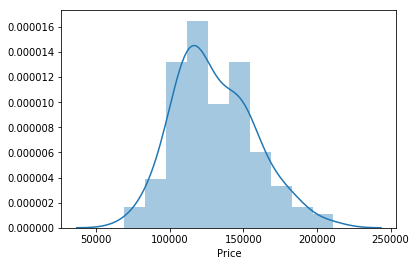

In [8]:
sns.distplot(house.Price)

In [9]:
house.corr()

,Price,SqFt,Bedrooms,Bathrooms,Offers
Price,1.000000,0.552982,0.525926,0.523258,-0.313636
SqFt,0.552982,1.000000,0.483807,0.522745,0.336923
Bedrooms,0.525926,0.483807,1.000000,0.414556,0.114271
Bathrooms,0.523258,0.522745,0.414556,1.000000,0.143793
Offers,-0.313636,0.336923,0.114271,0.143793,1.000000


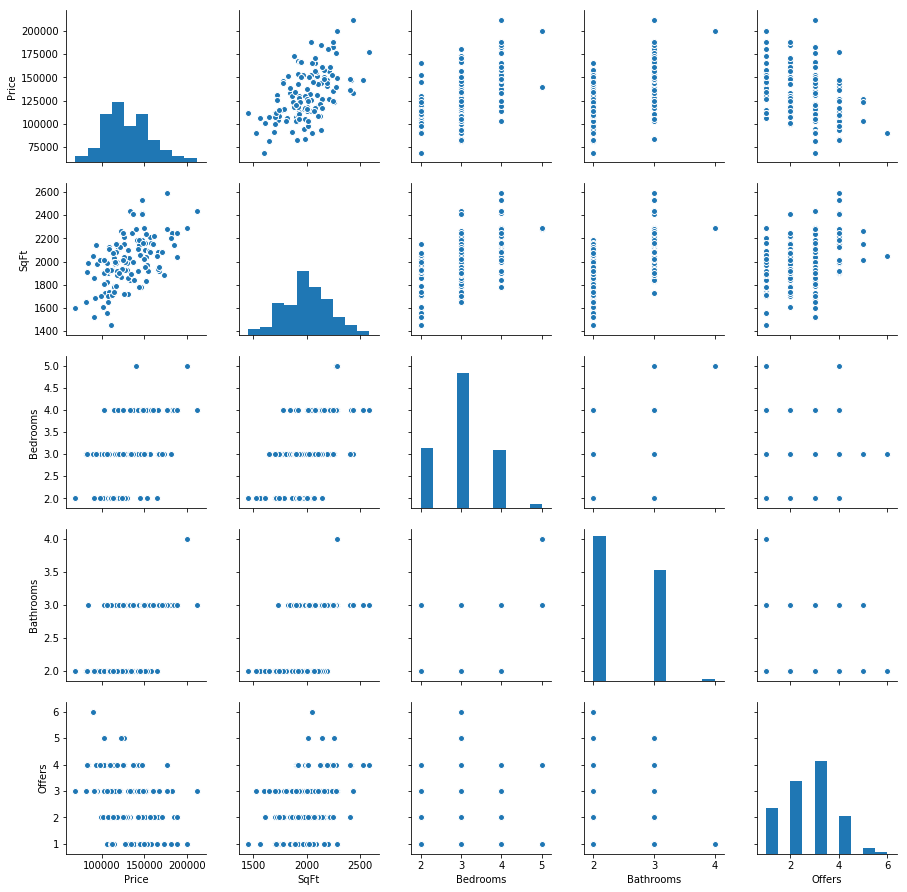

In [10]:
sns.pairplot(house)

In [11]:
house.dtypes

Price            int64
SqFt             int64
Bedrooms         int64
Bathrooms        int64
Offers           int64
Brick           object
Neighborhood    object
dtype: object

In [12]:
#breaking into numeric and categorical

numeric_house=['Price', 'SqFt']
cat_house=['Bathrooms', 'Bedrooms', 'Offers', 'Neighborhood', 'Brick']
print(numeric_house)
print(cat_house)

['Price', 'SqFt']
['Bathrooms', 'Bedrooms', 'Offers', 'Neighborhood', 'Brick']


In [13]:
house_num=house[numeric_house]
house_num.head()

,Price,SqFt
0,114300,1790
1,114200,2030
2,114800,1740
3,94700,1980
4,119800,2130


In [14]:
house_cat=house[cat_house]
house_cat.head()

,Bathrooms,Bedrooms,Offers,Neighborhood,Brick
0,2,2,2,East,No
1,2,4,3,East,No
2,2,3,1,East,No
3,2,3,3,East,No
4,3,3,3,East,No


In [15]:
#summary of numeric and categorical variables

In [16]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=house_num.apply(lambda x: var_summary(x)).T

In [17]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Price,128.0,0.0,16694700.0,130427.34375,125950.0,26868.770371,7.219308e+08,69100.0,81570.0,91310.0,102020.0,111325.0,125950.0,148250.0,166560.0,179465.0,196476.0,211200.0
SqFt,128.0,0.0,256120.0,2000.93750,2000.0,211.572431,4.476289e+04,1450.0,1530.8,1664.0,1720.0,1880.0,2000.0,2140.0,2250.0,2368.0,2505.7,2590.0


In [18]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=house_cat.apply(lambda x: cat_summary(x))

In [19]:
cat_summary

,Bathrooms,Bedrooms,Offers,Neighborhood,Brick
N,128,128,128,128,128
NMISS,0,0,0,0,0
ColumnsNames,"2 72 3 55 4 1 Name: Bathrooms, dtype...",3 67 2 30 4 29 5 2 Name: Bedrooms...,3 46 2 36 1 23 4 19 5 3 6 ...,East 45 North 44 West 39 Name: Neig...,"No 86 Yes 42 Name: Brick, dtype: int64"


In [20]:
#Handling Outliers 
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

house_num=house_num.apply(lambda x: outlier_capping(x))

In [21]:
num_summary=house_num.apply(lambda x: var_summary(x)).T
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Price,128.0,0.0,16689692.0,130388.218750,125950.0,26280.461229,6.906626e+08,81570.0,81767.100,91310.0,102020.0,111325.0,125950.0,148250.0,166560.0,179465.0,194268.480,196476.0
SqFt,128.0,0.0,256103.0,2000.804688,2000.0,207.625863,4.310850e+04,1530.8,1538.684,1664.0,1720.0,1880.0,2000.0,2140.0,2250.0,2368.0,2487.961,2505.7


In [22]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(house)

Number of variables,7
Number of observations,128
Total Missing (%),0.0%
Total size in memory,7.1 KiB
Average record size in memory,56.6 B
Numeric,5
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [23]:
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop(colname, axis=1, inplace=True)
    return df

In [24]:
house_cat=house[['Bathrooms', 'Bedrooms', 'Offers', 'Neighborhood', 'Brick']]

for c_feature in ['Bathrooms', 'Bedrooms', 'Offers', 'Neighborhood', 'Brick']:
    house_cat[c_feature] = house_cat[c_feature].astype('category')
    house_cat = create_dummies(house_cat , c_feature )

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [25]:
house_cat.head()

,Bathrooms_2,Bathrooms_3,Bathrooms_4,Bedrooms_2,Bedrooms_3,Bedrooms_4,Bedrooms_5,Offers_1,Offers_2,Offers_3,Offers_4,Offers_5,Offers_6,Neighborhood_East,Neighborhood_North,Neighborhood_West,Brick_No,Brick_Yes
0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
4,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0


In [26]:
house_new = pd.concat([house_num,house_cat], axis=1)

In [27]:
house_new.head()

,Price,SqFt,Bathrooms_2,Bathrooms_3,Bathrooms_4,Bedrooms_2,Bedrooms_3,Bedrooms_4,Bedrooms_5,Offers_1,Offers_2,Offers_3,Offers_4,Offers_5,Offers_6,Neighborhood_East,Neighborhood_North,Neighborhood_West,Brick_No,Brick_Yes
0,114300.0,1790.0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,114200.0,2030.0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
2,114800.0,1740.0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0
3,94700.0,1980.0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0
4,119800.0,2130.0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0


In [28]:
house_new.tail()

,Price,SqFt,Bathrooms_2,Bathrooms_3,Bathrooms_4,Bedrooms_2,Bedrooms_3,Bedrooms_4,Bedrooms_5,Offers_1,Offers_2,Offers_3,Offers_4,Offers_5,Offers_6,Neighborhood_East,Neighborhood_North,Neighborhood_West,Brick_No,Brick_Yes
123,119700.0,1900.0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1
124,147900.0,2160.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1
125,113500.0,2070.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0
126,149900.0,2020.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0
127,124600.0,2250.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0


In [35]:
house_new["ln_Price"]= np.log(house_new["Price"]+1)

C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


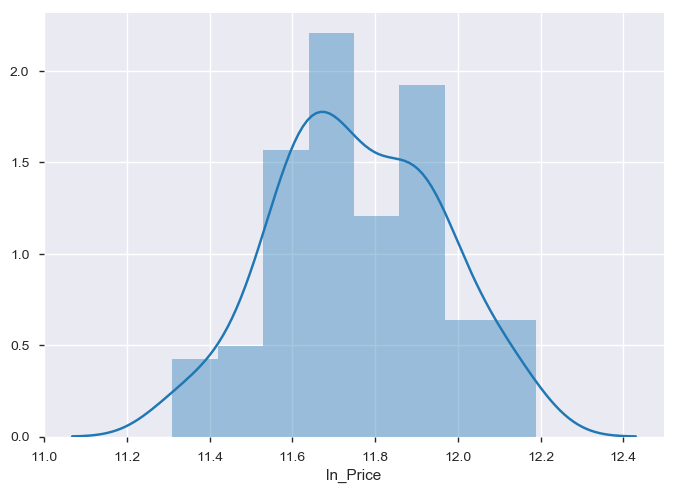

In [36]:
# Distribution of Y(price) variable) should be normal

sns.distplot(house_new.ln_Price)

In [37]:
house_new.drop('Price', axis=1, inplace=True)

In [38]:
house_new.columns

Index(['SqFt', 'Bathrooms_2', 'Bathrooms_3', 'Bathrooms_4', 'Bedrooms_2',
       'Bedrooms_3', 'Bedrooms_4', 'Bedrooms_5', 'Offers_1', 'Offers_2',
       'Offers_3', 'Offers_4', 'Offers_5', 'Offers_6', 'Neighborhood_East',
       'Neighborhood_North', 'Neighborhood_West', 'Brick_No', 'Brick_Yes',
       'ln_Price'],
      dtype='object')

In [39]:
house_new.corr()

,SqFt,Bathrooms_2,Bathrooms_3,Bathrooms_4,Bedrooms_2,Bedrooms_3,Bedrooms_4,Bedrooms_5,Offers_1,Offers_2,Offers_3,Offers_4,Offers_5,Offers_6,Neighborhood_East,Neighborhood_North,Neighborhood_West,Brick_No,Brick_Yes,ln_Price
SqFt,1.000000,-0.520577,0.499609,0.124083,-0.367632,-0.032062,0.358985,0.173128,-0.199512,-0.114179,-0.006788,0.319401,0.104268,0.021108,0.046980,-0.286627,0.247038,-0.088258,0.088258,0.553127
Bathrooms_2,-0.520577,1.000000,-0.984220,-0.100617,0.339241,-0.053210,-0.237484,-0.142857,0.166642,0.026270,-0.061541,-0.119044,-0.071566,0.078257,-0.010308,0.273551,-0.271585,0.155127,-0.155127,-0.493269
Bathrooms_3,0.499609,-0.984220,1.000000,-0.077023,-0.331227,0.069862,0.246528,0.017895,-0.200714,-0.016454,0.073492,0.125885,0.074162,-0.077023,0.021950,-0.262707,0.248319,-0.132872,0.132872,0.460387
Bathrooms_4,0.124083,-0.100617,-0.077023,1.000000,-0.049096,-0.092997,-0.048026,0.704317,0.189596,-0.055508,-0.066461,-0.037048,-0.013747,-0.007874,-0.065338,-0.064222,0.134048,-0.126976,0.126976,0.190748
Bedrooms_2,-0.367632,0.339241,-0.331227,-0.049096,1.000000,-0.579856,-0.299453,-0.069707,0.125347,0.187152,-0.183777,-0.075379,-0.085714,-0.049096,0.017503,0.259677,-0.286118,-0.006137,0.006137,-0.304191
Bedrooms_3,-0.032062,-0.053210,0.069862,-0.092997,-0.579856,1.000000,-0.567223,-0.132039,-0.123819,-0.133727,0.127854,0.046403,0.147820,0.084669,0.112873,0.064838,-0.183994,0.032794,-0.032794,-0.176482
Bedrooms_4,0.358985,-0.237484,0.246528,-0.048026,-0.299453,-0.567223,1.000000,-0.068188,-0.010254,-0.006486,0.061383,-0.015994,-0.083847,-0.048026,-0.163988,-0.313125,0.493225,0.020495,-0.020495,0.470039
Bedrooms_5,0.173128,-0.142857,0.017895,0.704317,-0.069707,-0.132039,-0.068188,1.000000,0.105113,-0.078811,-0.094363,0.124581,-0.019518,-0.011180,0.039169,-0.091184,0.053462,-0.180283,0.180283,0.163201
Offers_1,-0.199512,0.166642,-0.200714,0.189596,0.125347,-0.123819,-0.010254,0.105113,1.000000,-0.292770,-0.350543,-0.195404,-0.072506,-0.041531,-0.046282,-0.253045,0.309127,-0.149655,0.149655,0.263388
Offers_2,-0.114179,0.026270,-0.016454,-0.055508,0.187152,-0.133727,-0.006486,-0.078811,-0.292770,1.000000,-0.468521,-0.261169,-0.096909,-0.055508,0.012510,-0.050304,0.038932,0.067076,-0.067076,0.077166


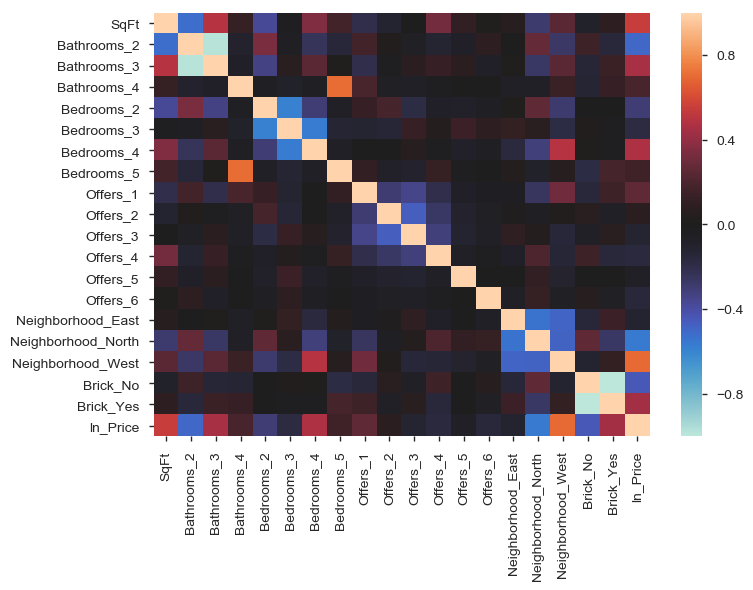

In [40]:
sns.heatmap(house_new.corr(), center=0.0)

In [41]:
#Splitting the data

feature_columns = house_new.columns.difference( ['ln_Price'] )
feature_columns

Index(['Bathrooms_2', 'Bathrooms_3', 'Bathrooms_4', 'Bedrooms_2', 'Bedrooms_3',
       'Bedrooms_4', 'Bedrooms_5', 'Brick_No', 'Brick_Yes',
       'Neighborhood_East', 'Neighborhood_North', 'Neighborhood_West',
       'Offers_1', 'Offers_2', 'Offers_3', 'Offers_4', 'Offers_5', 'Offers_6',
       'SqFt'],
      dtype='object')

In [42]:
train_X, test_X, train_y, test_y = train_test_split( house_new[feature_columns],
                                                  house_new['ln_Price'],
                                                  test_size = 0.3,
                                                  random_state = 1)

In [43]:
print(len(train_X))
print(len(test_X))

89
39


In [44]:
import statsmodels.api as sm

In [45]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [46]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_Price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     50.59
Date:                Mon, 03 Sep 2018   Prob (F-statistic):           3.12e-31
Time:                        20:00:46   Log-Likelihood:                 117.25
No. Observations:                  89   AIC:                            -208.5
Df Residuals:                      76   BIC:                            -176.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.8643      0.039    100.107      0.000       3.787       3.941
Bathrooms_2            1.8996      0.019    102.318      0.000       1.863       1.937
Bathrooms_3            1.9648      0.024     81.469      0.000       1.917       2.013
Bathrooms_4        -1.625e-15    2.3e-17    -70.691      0.000   -1.67e-15   -1.58e-15
Bedrooms_2             1.2618      0.018     72.087      0.000       1.227       1.297
Bedrooms_3             1.2858      0.016     82.296      0.000       1.255       1.317
Bedrooms_4             1.3168      0.022     58.953      0.000       1.272       1.361
Bedrooms_5         -4.711e-16   1.02e-17    -46.226      0.000   -4.91e-16   -4.51e-16
Brick_No               1.8722      0.021     89.660      0.000       1.831       1.914
Brick_Yes              1.9921      0.022     92.453      0.000       1.949       2.035
Neighborhood_East      1.2345      0.019     65.008      0.000       1.197       1.272
Neighborhood_North     1.2359      0.016     75.773      0.000       1.203       1.268
Neighborhood_West      1.3939      0.021     65.551      0.000       1.352       1.436
Offers_1               0.7934      0.024     33.071      0.000       0.746       0.841
Offers_2               0.7435      0.019     39.376      0.000       0.706       0.781
Offers_3               0.6700      0.018     37.433      0.000       0.634       0.706
Offers_4               0.6233      0.026     23.774      0.000       0.571       0.676
Offers_5               0.5877      0.039     14.905      0.000       0.509       0.666
Offers_6               0.4465      0.062      7.148      0.000       0.322       0.571
SqFt                   0.0004   5.23e-05      7.518      0.000       0.000       0.000
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                0.760
Skew:                           0.168   Prob(JB):                        0.684
Kurtosis:                       3.304   Cond. No.                     1.36e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.92e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [47]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print('MSE:', metrics.mean_squared_error(test_y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 0.18240420144540018
MSE: 0.3204945222407677
RMSE: 0.5661223562453329


In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [50]:
# check multicollinaerity
y, X = dmatrices('ln_Price~SqFt', house_new, return_type='dataframe')

In [51]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [52]:
vif

,VIF Factor,features
0,94.59502,Intercept
1,1.00000,SqFt


In [53]:
residuals = test_y - y_pred

C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


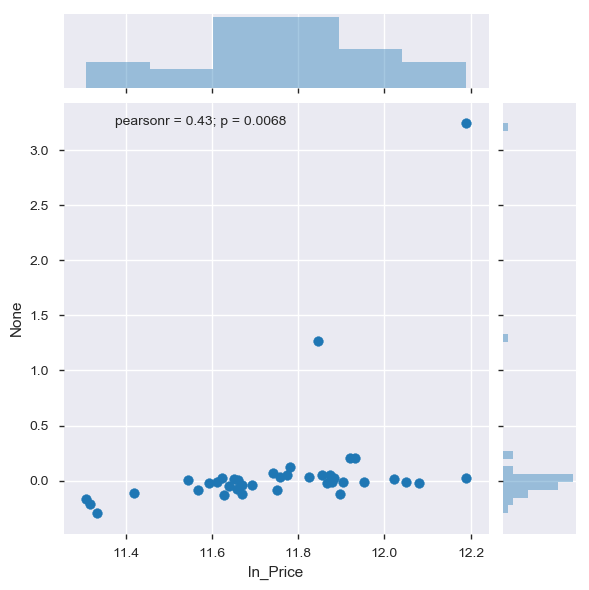

In [56]:
sns.jointplot(test_y,residuals )

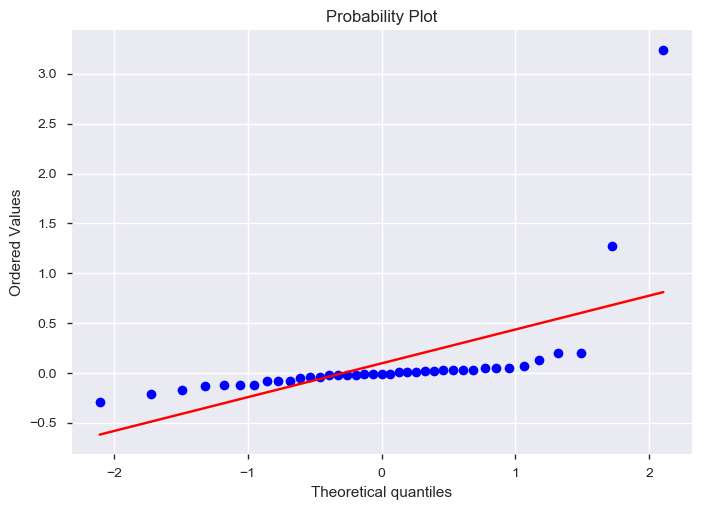

In [58]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()